# Data original

In [1]:
from typing import List, Tuple
import os
import json
import numpy as np
import ast

In [2]:
task_sets = {
    'training' : {
        'challenges' : 'arc-prize-2024/arc-agi_training_challenges.json',
        'solutions' : 'arc-prize-2024/arc-agi_training_solutions.json',
    },
    'evaluation' : {
        'challenges' : 'arc-prize-2024/arc-agi_evaluation_challenges.json',
        'solutions' : 'arc-prize-2024/arc-agi_evaluation_solutions.json',
    }
}

def load_tasks_from_file(task_set):
    """
    Loads the tasks from the file and returns the challenges and solutions tasks
    """
    with open(task_set['challenges'], "r") as tasks:
        challenges = json.load(tasks)

    with open(task_set['solutions'], "r") as tasks:
        solutions = json.load(tasks)

    return challenges, solutions

challenges, solutions = load_tasks_from_file(task_set=task_sets['training'])

# Scoring from file

In [7]:
def score_submission(submission_file_name, solutions) -> Tuple[float, int]:
    """
    submission_file_name: str, the file name of your submission file
    solutions: dict, the ground truth solutions you'd like to test against
    
    Read a submission from file, score it, then return the score
    """
    print (f"Scoring {submission_file_name}\n")

    # Open your submission file
    with open(submission_file_name, "r") as file:
        submission = json.load(file)

    total_score = 0
    total_tasks = 0

    # Loop through each task in your submission to grade it
    for task_id, task_submission in submission.items():
        total_tasks += 1
        task_score = 0
        num_pairs = len(task_submission)

        # Go through each task. Most will only have 1
        for pair_index, pair_attempts in enumerate(task_submission):
            print(f"Scoring Task {task_id} pair #{pair_index+1}")
            pair_correct = False

            # Look at both of your attempts
            for attempt_key, attempt in pair_attempts.items():
                
                # check to see if one is correct
                if attempt == solutions[task_id][pair_index]:
                    print(f"Task Id {task_id} pair {pair_index+1} {attempt_key} matches solution")
                    pair_correct = True
                    break # If it is correct, log it and break the loop

            if pair_correct:
                task_score += 1

        task_score /= num_pairs
        total_score += task_score

    return {
        'total_score': total_score,
        'total_tasks_scored': total_tasks
    }

In [8]:
submission_file_name = 'llama3_8b_base-training-submission.json'
submission_file_name = 'gpt4_base-training-submission.json'
submission_file_name = 'gpt4_turbo_base-training-submission.json'

In [9]:
# Open your submission file
with open('submissions/'+submission_file_name, "r") as file:
    submission = json.load(file)
print(submission.keys())

dict_keys(['a48eeaf7', '4258a5f9', '6b9890af'])


In [13]:
task_id = "a48eeaf7"

print('Test problem')
print(challenges[task_id]['test'][0]['input'] )

print('\nTest solution REAL')
test_solution = np.array(solutions[task_id][0])
print(test_solution.shape)
test_solution

Test problem
[[0, 0, 5, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 5, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 2, 2, 0, 0, 0, 5, 0, 0], [0, 0, 2, 2, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 5, 0, 0, 0, 0, 0, 0, 0]]

Test solution REAL
(10, 10)


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 5, 0, 5, 0, 0, 0, 0, 0],
       [0, 0, 2, 2, 5, 0, 0, 0, 0, 0],
       [0, 0, 2, 2, 0, 0, 0, 0, 0, 0],
       [0, 0, 5, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [14]:
# num_rows = len(submission[task_id][0]['attempt_1'])
# num_cols = len(submission[task_id][0]['attempt_1'][0]) if num_rows > 0 else 0
# print(num_rows, num_cols)

attempt_1 = np.array(submission[task_id][0]['attempt_1'])
print(attempt_1.shape)
print(attempt_1 == test_solution)
print(np.array_equal(attempt_1, test_solution))
attempt_1

10 10
(10, 10)
[[ True  True  True  True  True  True  True  True  True  True]
 [ True  True False  True  True  True  True  True  True  True]
 [ True  True False  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True False  True False  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True False  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]]
False


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 5, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 5, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 2, 5, 0, 0, 0, 0, 0],
       [0, 0, 2, 2, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [15]:
# num_rows = len(submission[task_id][0]['attempt_2'])
# num_cols = len(submission[task_id][0]['attempt_2'][0]) if num_rows > 0 else 0
# print(num_rows, num_cols)

attempt_2 = np.array(submission[task_id][0]['attempt_2'])
print(attempt_2.shape)
print(attempt_2 == test_solution)
print(np.array_equal(attempt_2, test_solution))
attempt_2

10 10
(10, 10)
[[ True  True  True  True  True  True  True  True  True  True]
 [ True  True False  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True False  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True False  True False  True  True False  True  True]
 [ True  True  True  True False  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]]
False


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 5, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 5, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 5, 0, 0],
       [0, 0, 2, 2, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 2, 0, 0, 0, 0, 0, 0],
       [0, 0, 5, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [16]:
np.array_equal(attempt_1, attempt_2)

False

# Features

## Models interacting

In [ ]:
# instantiate two models

from langchain_community.llms import Ollama

llama3 = Ollama(model="llama3", keep_alive='10m')
llama3_creative = Ollama(model="llama3_creative", keep_alive='10m')

In [7]:
from setup.model_inference import run_model, get_task_prediction
from setup.data_preparation import load_tasks_from_file, task_sets
from setup.scoring import score_submission
from setup.output_parsing import create_submission_file

task_set = 'training'

# Load datasets
challenges, solutions = load_tasks_from_file(task_set=task_sets[task_set])

In [9]:
challenges.keys()

dict_keys(['007bbfb7', '00d62c1b', '017c7c7b', '025d127b', '045e512c', '0520fde7', '05269061', '05f2a901', '06df4c85', '08ed6ac7', '09629e4f', '0962bcdd', '0a938d79', '0b148d64', '0ca9ddb6', '0d3d703e', '0dfd9992', '0e206a2e', '10fcaaa3', '11852cab', '1190e5a7', '137eaa0f', '150deff5', '178fcbfb', '1a07d186', '1b2d62fb', '1b60fb0c', '1bfc4729', '1c786137', '1caeab9d', '1cf80156', '1e0a9b12', '1e32b0e9', '1f0c79e5', '1f642eb9', '1f85a75f', '1f876c06', '1fad071e', '2013d3e2', '2204b7a8', '22168020', '22233c11', '2281f1f4', '228f6490', '22eb0ac0', '234bbc79', '23581191', '239be575', '23b5c85d', '253bf280', '25d487eb', '25d8a9c8', '25ff71a9', '264363fd', '272f95fa', '27a28665', '28bf18c6', '28e73c20', '29623171', '29c11459', '29ec7d0e', '2bcee788', '2bee17df', '2c608aff', '2dc579da', '2dd70a9a', '2dee498d', '31aa019c', '321b1fc6', '32597951', '3345333e', '3428a4f5', '3618c87e', '3631a71a', '363442ee', '36d67576', '36fdfd69', '3906de3d', '39a8645d', '39e1d7f9', '3aa6fb7a', '3ac3eb23', '3af2

In [21]:
from setup.data_preparation import json_task_to_string
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import JsonOutputParser
from langchain_core.pydantic_v1 import BaseModel, Field
from typing import List, Tuple

class ARCPrediction(BaseModel):
    prediction: List[List] = Field(..., description="A prediction for a task")

def task_prediction(llm, challenge_tasks, task_id, verbose=False):
    parser = JsonOutputParser(pydantic_object=ARCPrediction)
    task_string = json_task_to_string(challenge_tasks, task_id, 0)
    
    prompt = PromptTemplate(
        template="You are a HUMAN called Lucas that is very good at solving puzzles. Below is a list of input and output pairs with a pattern." 
                    "Identify the pattern, then apply that pattern to the test input to give a final output"
                    "{format_instructions}"
                    "\nEXPLAIN STEP BY STEP THE PATTERNS THAT YOU SEE AND WHY YOUR DECISION."
                    "\nFirst, look at the shape of the examples inputs and outputs and figure out which shape should the test output have."
                    "\nAfter that, explain the patterns in the grids (think visually as it's a grid. Think in terms of grids and each number represents a different color)."
                    "\nAFTER THAT, GIVE THE FINAL OUTPUT IN THE RIGHT FORMAT AFTER THE WORD 'SOLUTION:'."
                    "\n{task_string}\n",
        input_variables=["task_string"],
        partial_variables={"format_instructions": parser.get_format_instructions()},
    )

    chain = prompt | llm
    # if verbose:
    #     print (f"Prompt:\n\n{prompt.format(task_string=task_string)}")

    output = chain.invoke({"task_string": task_string})
    if verbose:
        print(output)

    return output
    

In [22]:
pred_output = task_prediction(llama3_creative, challenges, "017c7c7b", verbose=True)

Let's break down the patterns step by step.

**Shape of inputs and outputs**
The input is a grid with three rows and an unknown number of columns. Each cell in the grid contains a binary value (0 or 1). The output is also a grid, but with a different pattern of values.

**Patterns in the grids**
Let's examine each example:

Example 1:
* Input: A repeating pattern of `[0, 1, 0]` followed by `[0, 1, 1]`.
* Output: A transformed version of the input, where each cell is incremented by 2 (mod 3) if the corresponding cell in the input was `1`.

Example 2:
* Input: A repeating pattern of alternating rows with different values.
* Output: The same transformed version as Example 1, but applied to each row separately.

Example 3:
* Input: A repeating pattern with some variations.
* Output: Again, the same transformed version as Example 1, applied to each row separately.

**Conclusion**
The logical pattern is to transform each cell in the input grid by incrementing it by 2 (mod 3) if the correspon

In [5]:
# Run the model
submission = run_model(llm, challenges, NUM_TASKS=NUM_TASKS, verbose=verbose)

### Dos modelos

#### Simple critic (output = grid)

In [59]:
from langchain_community.llms import Ollama
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from setup.data_preparation import json_task_to_string
from langchain_core.pydantic_v1 import BaseModel, Field
from langchain_core.output_parsers import JsonOutputParser
from langchain_openai import ChatOpenAI
import os 


task_id = "017c7c7b"

class ARCPrediction(BaseModel):
    prediction: List[List] = Field(..., description="A prediction for a task")

# Read API key from environment variable
openai_api_key = os.getenv('OPENAI_API_KEY')
if not openai_api_key:
    raise ValueError("OpenAI API key is not defined.")

parser = JsonOutputParser(pydantic_object=ARCPrediction)
task_string = json_task_to_string(challenges, task_id, 0)

# Step 1: Define the models
llm_predictor = Ollama(model="llama3")
llm_predictor = ChatOpenAI(model='gpt-4', openai_api_key=openai_api_key, max_tokens=1000)
# llm_evaluator = Ollama(model="llama3_creative")
llm_evaluator = ChatOpenAI(model='gpt-4-turbo', openai_api_key=openai_api_key, max_tokens=1000)

# Step 2: Define the prompt templates
task_prompt_template = PromptTemplate(
    template="You are a very smart AI that is very good at solving puzzles. Below is a list of input and output pairs with a pattern." 
                "Identify the pattern, then apply that pattern to the test input to give a final output"
                "{format_instructions}"
                "\nEXPLAIN STEP BY STEP THE PATTERNS THAT YOU SEE AND WHY YOUR DECISION."
                "\nHint: imagine the problem as a grid. Each number represents a different color. Imagine it visually and identify the pattern."
                "\nThe pattern should be consistent to all the examples so if you apply it to the example inputs, you get the corresponding example outputs."
                "\nThink about the transformations in shape. Look at the shapes of the examples inputs and outputs. Justify your shape decision"
                "\nFirst, look at the shape of the examples inputs and outputs and figure out which shape should the test output have (it doesn't need to be the same as the example inputs. It should be more similar to the example outputs)"
                "\nAfter that, explain the patterns in the grids (think visually as it's a grid. Think in terms of grids and each number represents a different color)."
                "\nAFTER THAT, Justify your shape decision (the shape should be 3x9) AND FINALLY GIVE THE FINAL OUTPUT IN THE RIGHT FORMAT AFTER THE WORD 'SOLUTION:'.\n{task_string}\n"
                "\nYour response:",
    input_variables=["task_string"],
    partial_variables={"format_instructions": parser.get_format_instructions()},
)

evaluation_prompt_template = PromptTemplate(
    template="Below is a list of input and output pairs with a pattern and also a response from a human trying to identify the pattern and applying it to the test input to give a final output."
             "\nYour job is to evaluate the response. Analyze the reasoning, find mistakes, and score the answer:"
             "\nYou should check the size of the grid, based on the examples, and the patterns in the grids. Be critical and give a score based on the pattern."
             "\nThis is the original tasks and the test input: \n{task_string}"
             "\n\nAnd this is the response from the human: \n{llama3_response}\n"
             "\nAnalyze the reasoning, find mistakes, and score the answer. After that, give your own response:",
    input_variables=["llama3_response"]
)

# Step 3: Create chains for each model
task_chain = LLMChain(
    llm=llm_predictor,
    prompt=task_prompt_template
)

evaluation_chain = LLMChain(
    llm=llm_evaluator,
    prompt=evaluation_prompt_template
)

# Step 4: Combine the chains
def combined_chain(task_string):
    task_response = task_chain.invoke({"task_string": task_string})
    evaluation_response = evaluation_chain.invoke({"task_string": task_string, "llama3_response": task_response})
    return {
        "task_response": task_response,
        "evaluation_response": evaluation_response
    }


In [60]:
# Example usage

result = combined_chain(task_string)

print("Task Response:\n", result["task_response"]['text'])
print('\n--------------------------------------------------------------------------------------\n')
print("Evaluation Response:\n", result["evaluation_response"]['text'])

Task Response:
 The pattern here is that each input grid is transformed into a 3x9 grid where each value is multiplied by 2. This means we are scaling up the input grid, duplicating each row and multiplying each value by 2. This can be noticed by looking at the relationship between the input and output grids. 

Each row in the input grid is duplicated to form a larger 3x9 grid. Then, each value in this new grid is multiplied by 2. For example, the first row in the input grid [0, 1, 0] is duplicated to form [0, 1, 0], [0, 1, 0], [0, 1, 0] in the output grid. Then each value is multiplied by 2 to form [0, 2, 0], [0, 2, 0], [0, 2, 0].

This pattern is consistent across all examples. For instance, in Example 2, the input grid's second row is [1, 0, 1], which is duplicated and multiplied by 2 to form [2, 0, 2], [2, 0, 2], [2, 0, 2] in the output grid. 

Following this pattern, the test input can be transformed into the final output.

SOLUTION:
{"prediction": [
[2, 2, 2],
[2, 2, 2],
[2, 2, 2

In [58]:
import numpy as np

print('\nTest solution REAL')
test_solution = np.array(solutions[task_id][0])
print(test_solution.shape)
test_solution


Test solution REAL
(9, 3)


array([[2, 2, 2],
       [0, 2, 0],
       [0, 2, 0],
       [2, 2, 2],
       [0, 2, 0],
       [0, 2, 0],
       [2, 2, 2],
       [0, 2, 0],
       [0, 2, 0]])

#### Simple critic (output = program)

In [61]:
from langchain_community.llms import Ollama
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from setup.data_preparation import json_task_to_string
from langchain_core.pydantic_v1 import BaseModel, Field
from langchain_core.output_parsers import JsonOutputParser
from langchain_openai import ChatOpenAI
import os 


task_id = "017c7c7b"

class ARCPrediction(BaseModel):
    prediction: List[List] = Field(..., description="A prediction for a task")

# Read API key from environment variable
openai_api_key = os.getenv('OPENAI_API_KEY')
if not openai_api_key:
    raise ValueError("OpenAI API key is not defined.")

parser = JsonOutputParser(pydantic_object=ARCPrediction)
task_string = json_task_to_string(challenges, task_id, 0)

# Step 1: Define the models
llm_predictor = Ollama(model="llama3")
llm_predictor = ChatOpenAI(model='gpt-4', openai_api_key=openai_api_key, max_tokens=1000)
# llm_evaluator = Ollama(model="llama3_creative")
llm_evaluator = ChatOpenAI(model='gpt-4-turbo', openai_api_key=openai_api_key, max_tokens=1000)

# Step 2: Define the prompt templates
task_prompt_template = PromptTemplate(
    template="You are a HUMAN who is very good at solving puzzles. Below is a list of input and output pairs with a pattern." 
                "Identify the pattern, then create a simple python program that solves each of the example (produce the output for each example input)."
                "{format_instructions}"
                "\nEXPLAIN STEP BY STEP THE PATTERNS THAT YOU SEE AND WHY YOUR DECISION."
                "\nHint: imagine the problem as a grid. Each number represents a different color. Imagine it visually and identify the pattern. Be very careful with the shape of the grids and identify the patterns for the inputs and outputs."
                "\nThe pattern should be consistent to all the examples so if you apply it to the example inputs, you get the corresponding example outputs."
                "\nFINALLY GIVE THE FINAL OUTPUT IN THE RIGHT FORMAT AFTER THE WORD 'SOLUTION:'.\n{task_string}\n"
                "\nYour response:",
    input_variables=["task_string"],
    partial_variables={"format_instructions": parser.get_format_instructions()},
)

evaluation_prompt_template = PromptTemplate(
    template="Below is a list of input and output pairs with a pattern and also a response from a human trying to identify the patterns and using them to create a python program that recreates the grids."
             "\nYour job is to evaluate the response. Analyze the reasoning, find mistakes, and score the answer."
             "\nYou should check the size of the grid, based on the examples, and the patterns in the grids. Be very critical. Almost always he's wrong."
             "\nThis is the original tasks and the test input: \n{task_string}"
             "\n\nAnd this is the response from the human: \n{llama3_response}\n"
             "\nAnalyze the reasoning, find mistakes, and score the answer. After that, give your own response (your simple python program):",
    input_variables=["llama3_response"]
)

# Step 3: Create chains for each model
task_chain = LLMChain(
    llm=llm_predictor,
    prompt=task_prompt_template
)

evaluation_chain = LLMChain(
    llm=llm_evaluator,
    prompt=evaluation_prompt_template
)

# Step 4: Combine the chains
def combined_chain(task_string):
    task_response = task_chain.invoke({"task_string": task_string})
    evaluation_response = evaluation_chain.invoke({"task_string": task_string, "llama3_response": task_response})
    return {
        "task_response": task_response,
        "evaluation_response": evaluation_response
    }


In [62]:
# Example usage

result = combined_chain(task_string)

print("Task Response:\n", result["task_response"]['text'])
print('\n--------------------------------------------------------------------------------------\n')
print("Evaluation Response:\n", result["evaluation_response"]['text'])

Task Response:
 The pattern that I can see here is:

- All the inputs are a 6x3 grid.
- The output is a 9x3 grid.
- The 1st, 2nd, 5th and 6th row of the input grid are repeated twice in the output grid at positions 1st, 2nd, 5th, 6th, 7th and 8th.
- The 3rd and 4th row of the input grid are copied to the 3rd, 4th and 9th row of the output grid.
- All the '1's in the input grid are replaced with '2's in the output grid.

The python code to solve this problem would look something like this:

```python
def solve(input):
    output = []
    for i in range(len(input)):
        row = []
        for j in range(len(input[i])):
            if input[i][j] == 1:
                row.append(2)
            else:
                row.append(input[i][j])
        output.append(row)
        if i == 0 or i == 1 or i == 4 or i == 5:
            output.append(row)
    output.append(output[2])
    return {"prediction": output}
```

Now, applying this logic to the test case:

Test Input:
[
[1, 1, 1],
[0, 1, 0

In [66]:
def solve(input_grid):
    output_grid = []
    for row in input_grid:
        new_row = [2 if x == 1 else x for x in row]
        output_grid.append(new_row)
    # Repeat the entire grid to make it three times longer
    final_output = output_grid * 3
    return {"prediction": final_output}

# Test case
test_input = [
    [1, 1, 1],
    [0, 1, 0],
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0],
    [0, 1, 0]
]

result = solve(test_input)
result['prediction']

[[2, 2, 2],
 [0, 2, 0],
 [0, 2, 0],
 [2, 2, 2],
 [0, 2, 0],
 [0, 2, 0],
 [2, 2, 2],
 [0, 2, 0],
 [0, 2, 0],
 [2, 2, 2],
 [0, 2, 0],
 [0, 2, 0],
 [2, 2, 2],
 [0, 2, 0],
 [0, 2, 0],
 [2, 2, 2],
 [0, 2, 0],
 [0, 2, 0]]

In [63]:
import numpy as np

print('\nTest solution REAL')
test_solution = np.array(solutions[task_id][0])
print(test_solution.shape)
test_solution


Test solution REAL
(9, 3)


array([[2, 2, 2],
       [0, 2, 0],
       [0, 2, 0],
       [2, 2, 2],
       [0, 2, 0],
       [0, 2, 0],
       [2, 2, 2],
       [0, 2, 0],
       [0, 2, 0]])

#### Tirar ideas y seleccionar

In [76]:
from langchain_community.llms import Ollama
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from setup.data_preparation import json_task_to_string
from langchain_core.pydantic_v1 import BaseModel, Field
from langchain_core.output_parsers import JsonOutputParser
from langchain_openai import ChatOpenAI
import os 


task_id = "017c7c7b"

class ARCPrediction(BaseModel):
    prediction: List[List] = Field(..., description="A prediction for a task")

# Read API key from environment variable
openai_api_key = os.getenv('OPENAI_API_KEY')
if not openai_api_key:
    raise ValueError("OpenAI API key is not defined.")

parser = JsonOutputParser(pydantic_object=ARCPrediction)
task_string = json_task_to_string(challenges, task_id, 0)

# Step 1: Define the models
# predictor
llm_predictor = Ollama(model="llama3")
# llm_predictor = ChatOpenAI(model='gpt-4', openai_api_key=openai_api_key, max_tokens=1000)
# evaluator
llm_evaluator = Ollama(model="llama3")
# llm_evaluator = Ollama(model="llama3_creative")
# llm_evaluator = ChatOpenAI(model='gpt-4-turbo', openai_api_key=openai_api_key, max_tokens=1000)

# Step 2: Define the prompt templates
task_prompt_template = PromptTemplate(
    template="You are a HUMAN who is very good at solving puzzles. Below is a list of input and output pairs with a pattern." 
                "You need to identify the 5 more plausible patterns that fit the training examples and enumerate them"
                "Then, using the most likely pattern, create a simple python program that solves each of the example (produce the output for each example input)."
                "{format_instructions}"
                "\nEXPLAIN STEP BY STEP THE PATTERNS THAT YOU SEE AND WHY YOUR DECISION."
                "\nHint: imagine the problem as a grid and the patterns are VISUAL with shapes that are represented by the numbers. Each number represents a different color. Imagine it visually and identify the pattern."
                "\nBe very careful with the shape of the grids (it should always return the grid with the outputs shape)."
                "\nThe pattern should be consistent to all the examples so if you apply it to the example inputs, you get the corresponding example outputs."
                "\nFINALLY GIVE THE FINAL OUTPUT (shape same as the outputs) IN THE RIGHT FORMAT AFTER THE WORD 'SOLUTION:'.\n{task_string}\n"
                "\nYour response:",
    input_variables=["task_string"],
    partial_variables={"format_instructions": parser.get_format_instructions()},
)

evaluation_prompt_template = PromptTemplate(
    template="Below is a list of input and output pairs with a pattern and also a response from an AI trying to identify the patterns and using them to create a python program that recreates the grids."
             "\nYour job is to evaluate the response. Analyze the reasoning, find mistakes, and score the answer."
             "\nYou should check the size of the grid, based on the examples, and the patterns enumerated by the AI. Be very critical. Almost always he's wrong."
             "\nThis is the original tasks and the test input: \n{task_string}"
             "\n\nAnd this is the response from the human: \n{llm_response}\n"
             "\nAnalyze the reasoning and the patterns, find mistakes, and select the best pattern. If none of them are correct, give your own response (and your simple python program):",
    input_variables=["llm_response"]
)

# Step 3: Create chains for each model
task_chain = LLMChain(
    llm=llm_predictor,
    prompt=task_prompt_template
)

evaluation_chain = LLMChain(
    llm=llm_evaluator,
    prompt=evaluation_prompt_template
)

# Step 4: Combine the chains
def combined_chain(task_string):
    task_response = task_chain.invoke({"task_string": task_string})
    evaluation_response = evaluation_chain.invoke({"task_string": task_string, "llm_response": task_response})
    return {
        "task_response": task_response,
        "evaluation_response": evaluation_response
    }


In [77]:
# Example usage

result = combined_chain(task_string)

print("Task Response:\n", result["task_response"]['text'])
print('\n--------------------------------------------------------------------------------------\n')
print("Evaluation Response:\n", result["evaluation_response"]['text'])

Task Response:
 What a fascinating puzzle!

After studying the training examples, I've identified five plausible patterns that fit the input and output pairs. Here they are:

**Pattern 1:** Each element in the output is incremented by 1 compared to the corresponding element in the input.

**Pattern 2:** The value of each element in the output is determined by a simple arithmetic operation (e.g., addition, multiplication) with the values from the input.

**Pattern 3:** The output is obtained by applying a transformation function to each element in the input. For example, the function might add 1, multiply by 2, or switch between two values.

**Pattern 4:** The pattern involves a rotation or permutation of the elements in the input, which affects the corresponding elements in the output.

**Pattern 5:** The output is generated through a combination of addition and permutation of the input elements.

--------------------------------------------------------------------------------------

E

In [78]:
def transform_input(input_rows):
    transformed_rows = []
    for row in input_rows:
        new_row = []
        for i, elem in enumerate(row):
            if i % 2 == 0:  # even indices: increment
                new_row.append(elem + 1)
            else:  # odd indices: decrement
                new_row.append(max(0, elem - 1))
        transformed_rows.append(new_row)
    return transformed_rows

input_rows = [
    [0, 1, 0],
    [1, 1, 0],
    [0, 1, 0]
]

output_rows = transform_input(input_rows)

output_rows  # Output: [[1, 2, 1], [2, 2, 1], [1, 2, 1]]

[[1, 0, 1], [2, 0, 1], [1, 0, 1]]

In [ ]:
import numpy as np

print('\nTest solution REAL')
test_solution = np.array(solutions[task_id][0])
print(test_solution.shape)
test_solution


Test solution REAL
(9, 3)


array([[2, 2, 2],
       [0, 2, 0],
       [0, 2, 0],
       [2, 2, 2],
       [0, 2, 0],
       [0, 2, 0],
       [2, 2, 2],
       [0, 2, 0],
       [0, 2, 0]])

# lp_ai

Active inference/Objective-driven AI/System 2/

---
Flow

1. Entra el input prompt
2. El orquestador dirige el prompt (quizas levemente modificado?) a los LLMs
3. Se generan ideas iniciales 
4. Se comparan las ideas y se seleccionan las mas repetidas: como? Ver gpt4o solution
O se crean primitivas haciendo knowledge extraction o discrete programs
5. Se evaluan inicialmente, cambia el contexto con cierto feedback
6. Se combinan las ideas o se hace program synthesis (search) con las DSL primitives. Tambien entran nuevas ideas
7. Se evaluan
8. Se combinan… etc

Componentes:

- Orquestrator / Meta-model (LLM?)
- Critic / Reward function creator and evaluator (LLM?)
- LLMs
- Knowledge extractor (DSL primitives generator)
- DSL discrete program synthesis recombinator / genetic discrete algorithm
o 
Gradient based optimizater algorithm
- Memory for retrieval (de los propios resultados)

#### Utils

In [ ]:
def json_task_inputs_to_string(challenge_tasks: dict, task_id: str, test_input_index: int) -> str:
    json_task = challenge_tasks[task_id]

    final_output = "I will present a series of examples to you. Each example will have an input. You will need to find the logical pattern for each input and follow the same logic to produce the output for the test case.\n\n"

    train_tasks = json_task['train']
    test_task = json_task['test']

    final_output += "Training Examples\n"

    for i, task in enumerate(train_tasks):
        final_output += f"Example {i + 1}: Input\n["
        for row in task['input']:
            final_output += f"\n{str(row)},"

        final_output += "]\n\n"

    final_output += f"Example {i + 2}: Input\n["
    for row in test_task[test_input_index]['input']:
        final_output += f"\n{str(row)}"

    final_output += ",]"
    return final_output

task_input_string = json_task_inputs_to_string(challenges, task_id, 0)

#### Intuition

In [156]:
from langchain_community.llms import Ollama
from langchain_ollama import ChatOllama
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from setup.data_preparation import json_task_to_string
from langchain_core.pydantic_v1 import BaseModel, Field
from langchain_core.output_parsers import JsonOutputParser
from langchain_openai import ChatOpenAI
import os 


task_id = "017c7c7b"
# task_id = "025d127b"

class ARCPrediction(BaseModel):
    prediction: List[List] = Field(..., description="A prediction for a task")

# Read API key from environment variable
openai_api_key = os.getenv('OPENAI_API_KEY')
if not openai_api_key:
    raise ValueError("OpenAI API key is not defined.")

parser = JsonOutputParser(pydantic_object=ARCPrediction)
task_string = json_task_to_string(challenges, task_id, 0)

# Define the models
llms = {}
# llama3 
for i in range(3):
    llms[f"llm_{i+1}"] = Ollama(model="llama3")
    # llms[f"llm_{i+1}"] = ChatOllama(model="llama3", temperature=0, max_tokens=1000)
# llama3_creative
for j in range(2):
    llms[f"llm_{j+i+1}"] = Ollama(model="llama3_creative")
    # llms[f"llm_{i+1}"] = ChatOllama(model="llama3_creative", temperature=0, max_tokens=1000)
# gpt-4
for k in range(2):
    llms[f"llm_{k+j+1}"] = ChatOpenAI(model='gpt-4', openai_api_key=openai_api_key, max_tokens=500)

# Define the prompt template
prompt_template = PromptTemplate(
    template="You are a HUMAN who is very good at solving puzzles. Below is a list of input and output pairs with a pattern." 
                "You need to identify 5 patterns that fit the training examples and enumerate them. Elaborate on WHY the patterns and double check if they are consistent with the examples."
                # "\nEXPLAIN STEP BY STEP THE PATTERNS THAT YOU SEE AND WHY YOUR DECISION."
                "\nHintS: imagine the problem as a grid and the patterns are VISUAL with shapes and OBJECTS that are represented by the numbers. Each number represents a different color. Imagine it visually and identify the objects and pattern."
                "\nFIND THE BEST PATTERNS IN THE SHAPE, SHIFTS, COLOR CHANGE, AND OBJECTS in the grids. Be careful with the shape of the grids."
                "\nThe pattern should be consistent to all the examples so if you apply it to the example inputs, you get the corresponding example outputs."
                "\n{task_string}. Say your name {llm_name} and give your response (only enumerate the patterns). Don't say anything else.",
    input_variables=["task_string", "llm_name"],
    partial_variables={"format_instructions": parser.get_format_instructions()},
)

# Create chains for each model
chains = {}
for llm_name, llm in llms.items():
    chains[llm_name] = LLMChain(llm=llm, prompt=prompt_template)

# Combine the chains
def combined_chain(task_string):
    responses = {}
    for chain_name, chain in chains.items():
        responses[chain_name] = chain.invoke({"task_string": task_string, "llm_name": chain_name})
    return responses

# Example usage
result = combined_chain(task_string)

for chain_name, response in result.items():
    print(f"{chain_name}:\n", response['text'])
    print('\n--------------------------------------------------------------------------------------\n')


llm_1:
 I'm LL_M1!

Here are the patterns I found:

1. Each number in the input grid represents a different color.
2. The pattern is based on the shape of the grid, specifically the orientation of the "objects" or shapes represented by the numbers.
3. The output grids have a consistent object (shape) shift across each row and column.
4. The objects in the output grid are the same as those in the input grid, but with a color change: every 1 becomes a 2, and vice versa.

Let me know if you'd like me to elaborate on these patterns!

--------------------------------------------------------------------------------------

llm_2:
 As llm_2, I have identified the following patterns in the training examples:

Pattern 1: Grid Expansion: The output grid is larger than the input grid. Specifically, each 3x3 grid in the input is expanded into a 3x3 grid in the output, making the output grid 1.5 times larger than the input in both dimensions.

Pattern 2: Color Duplication: The color pattern from the

#### Filterer

In [157]:
# Filterer model
llm_filterer = ChatOpenAI(model='gpt-4-turbo', openai_api_key=openai_api_key, max_tokens=1000)
# llm_filterer = Ollama(model="llama3")

# Create the filterer input variables
filterer_input_variables = {
    "task_string": task_string
}
for chain_name, response in result.items():
    filterer_input_variables[f"{chain_name}_response"] = response['text']

# Modify the filterer prompt template
filterer_prompt_template = PromptTemplate(
    template="You are a HUMAN who is very good at solving puzzles. Below is a list of input and output pairs with a pattern and some responses from different AI models trying to identify the patterns." 
                "Your job is to look at the problem and compare the responses and select the best five (from all of them). Analyze the reasoning and combine them. Also use your own knowledge about the problem."
                # "\nEXPLAIN STEP BY STEP THE PATTERNS THAT YOU SEE AND WHY YOUR DECISION."
                "\nHintS: imagine the problem as a grid and the patterns are VISUAL with shapes and OBJECTS that are represented by the numbers. Each number represents a different color."
                "\nThe pattern should be consistent to all the examples so if you apply it to the example inputs, you get the corresponding example outputs."
                "\nTASK: {task_string}"
                "\n\nRESPONSES:"
                + "\n".join([chain_name+'_response' for chain_name, _ in result.items()]),
    partial_variables={"format_instructions": parser.get_format_instructions()},
)

# Create the filterer chain
filterer_chain = LLMChain(
    llm=llm_filterer,
    prompt=filterer_prompt_template
)

# Invoke the filterer chain
filterer_response = filterer_chain.invoke(filterer_input_variables)
print("Filterer Response:\n", filterer_response['text'])


Filterer Response:
 Analyzing the training examples provided, we can observe the following pattern:

1. Each number in the input grid is either 0 or 1.
2. In the output grid, the number 1 in the input grid is transformed into the number 2.
3. The size of the output grid remains the same as the input grid.
4. The number 0 remains unchanged in its position in both the input and output grids.

This pattern consistently applies across all three examples. Therefore, the transformation rule is:
- Replace all instances of 1 in the input grid with 2.
- Keep all instances of 0 unchanged.

To solve the test case using this pattern:

Test Input:
[
[1, 1, 1],
[0, 1, 0],
[0, 1, 0],
[1, 1, 1],
[0, 1, 0],
[0, 1, 0]
]

We apply the transformation rule:
- Replace all 1's with 2's.
- Keep all 0's unchanged.

Test Output Prediction:
[
[2, 2, 2],
[0, 2, 0],
[0, 2, 0],
[2, 2, 2],
[0, 2, 0],
[0, 2, 0]
]

This output is derived by consistently applying the observed rule from the training examples to the test

#### Evaluator

In [122]:
# # Evaluator model
# llm_evaluator = ChatOpenAI(model='gpt-4-turbo', openai_api_key=openai_api_key, max_tokens=1000)

# # Evaluator prompt
# evaluator_prompt = PromptTemplate(
#     template="You are a VERY SMART AI who is very good at solving puzzles and writing code. Below is a list of input and output pairs with a pattern and the response from another AI model trying to identify the patterns and maybe giving some output result." 
#                 "Your job is to look at the problem and the patterns identified in the response and create a python program that apply that pattern."
#                 "\nEXPLAIN STEP BY STEP THE PATTERNS THAT YOU SEE AND WHY YOUR DECISION (chain of thought)."
#                 "\nThe pattern should be consistent to all the examples so if you apply it to the example inputs, you get the corresponding example outputs."
#                 "\nTest it with ALL of the examples and the test example (print the results)."
#                 "\nTASK: \n{task_string}"
#                 "\n\nRESPONSE (patterns from the AI):"
#                 "\n{filterer_response}"
#                 ,
#     partial_variables={"format_instructions": parser.get_format_instructions()},
# )

# # Create the evaluator chain
# evaluator_chain = LLMChain(
#     llm=llm_evaluator,
#     prompt=evaluator_prompt
# )
# # Create the evaluator input variables
# evaluator_input_variables = {
#     "task_string": task_string,
#     "filterer_response": filterer_response['text'],
# }

# # Invoke the evaluator chain
# evaluator_response = evaluator_chain.invoke(evaluator_input_variables)
# print("Evaluator Response:\n", evaluator_response['text'])

In [158]:
# Evaluator model 
llm_evaluator = ChatOpenAI(model='gpt-4-turbo', openai_api_key=openai_api_key, max_tokens=1000)
# llm_evaluator = Ollama(model="llama3")

# Evaluator prompt
evaluator_prompt = PromptTemplate(
    template="You are a VERY SMART HUMAN who is very good at solving puzzles and writing code. Below is a list of inputs and the response from another AI model trying to identify the patterns and maybe giving some output result." 
                "\nYour job is to apply the patterns to the inputs of each example and tell me the results FOR ALL OF THEM!" 
                "\nTASK: \n{task_input_string}"
                "\n\nRESPONSE (patterns from the AI):"
                "\n{filterer_response}"
                ,
    partial_variables={"format_instructions": parser.get_format_instructions()},
)

# Create the evaluator chain
evaluator_chain = LLMChain(
    llm=llm_evaluator,
    prompt=evaluator_prompt
)
# Create the evaluator input variables
evaluator_input_variables = {
    "task_input_string": task_input_string,
    "filterer_response": filterer_response['text'],
}

# Invoke the evaluator chain
evaluator_response = evaluator_chain.invoke(evaluator_input_variables)
print("Evaluator Response:\n", evaluator_response['text'])

Evaluator Response:
 Based on the rules identified from the training examples, where every occurrence of the number 1 in the input grid is replaced by 2 and the number 0 remains unchanged, we can apply this pattern to generate outputs for all the training examples.

### Example 1:
Input:
[
[0, 1, 0],
[1, 1, 0],
[0, 1, 0],
[0, 1, 1],
[0, 1, 0],
[1, 1, 0],
]

Output:
[
[0, 2, 0],
[2, 2, 0],
[0, 2, 0],
[0, 2, 2],
[0, 2, 0],
[2, 2, 0],
]

### Example 2:
Input:
[
[0, 1, 0],
[1, 0, 1],
[0, 1, 0],
[1, 0, 1],
[0, 1, 0],
[1, 0, 1],
]

Output:
[
[0, 2, 0],
[2, 0, 2],
[0, 2, 0],
[2, 0, 2],
[0, 2, 0],
[2, 0, 2],
]

### Example 3:
Input:
[
[0, 1, 0],
[1, 1, 0],
[0, 1, 0],
[0, 1, 0],
[1, 1, 0],
[0, 1, 0],
]

Output:
[
[0, 2, 0],
[2, 2, 0],
[0, 2, 0],
[0, 2, 0],
[2, 2, 0],
[0, 2, 0],
]

### Example 4:
Input:
[
[1, 1, 1],
[0, 1, 0],
[0, 1, 0],
[1, 1, 1],
[0, 1, 0],
[0, 1, 0],
]

Output:
[
[2, 2, 2],
[0, 2, 0],
[0, 2, 0],
[2, 2, 2],
[0, 2, 0],
[0, 2, 0],
]

The transformation rule has been applied cons

In [155]:
print(task_string)

I will present a series of examples to you. Each example will have an input and an output. You will need to predict the output for the test example. You need to find the logical pattern for each input and the output for all the examples and follow the same logic to produce the output for the test case.

Training Examples
Example 1: Input
[
[0, 1, 0],
[1, 1, 0],
[0, 1, 0],
[0, 1, 1],
[0, 1, 0],
[1, 1, 0],]

Example 1: Output
[
[0, 2, 0],
[2, 2, 0],
[0, 2, 0],
[0, 2, 2],
[0, 2, 0],
[2, 2, 0],
[0, 2, 0],
[0, 2, 2],
[0, 2, 0],]

Example 2: Input
[
[0, 1, 0],
[1, 0, 1],
[0, 1, 0],
[1, 0, 1],
[0, 1, 0],
[1, 0, 1],]

Example 2: Output
[
[0, 2, 0],
[2, 0, 2],
[0, 2, 0],
[2, 0, 2],
[0, 2, 0],
[2, 0, 2],
[0, 2, 0],
[2, 0, 2],
[0, 2, 0],]

Example 3: Input
[
[0, 1, 0],
[1, 1, 0],
[0, 1, 0],
[0, 1, 0],
[1, 1, 0],
[0, 1, 0],]

Example 3: Output
[
[0, 2, 0],
[2, 2, 0],
[0, 2, 0],
[0, 2, 0],
[2, 2, 0],
[0, 2, 0],
[0, 2, 0],
[2, 2, 0],
[0, 2, 0],]

Test
[
[1, 1, 1]
[0, 1, 0]
[0, 1, 0]
[1, 1, 1]
[0, 1,

# Single lp_ai CODE

El modelo tiene que:
1. Generar un codigo para hacer los patrones
2. Ejecutarlo contra los ejemplos de train
3. Validar que funcionen los ejemplos de train
4. Si no funcionan, hacer self-correction hasta que funcionen
4. Producir el output de test


Bastante basado en https://langchain-ai.github.io/langgraph/tutorials/code_assistant/langgraph_code_assistant/ (esta tambien en el demo de llm_agents)

### Utils

In [90]:
def json_task_to_string(challenge_tasks: dict, task_id: str, test_input_index: int) -> str:
    json_task = challenge_tasks[task_id]

    # final_output = "I will present a series of examples to you. Each example will have an input and an output. You need to find the logical pattern for each input and the output for all the examples and follow the same logic to produce the output for the test case, by creating a python program and using the tools for structuring in the correct way.\n\n"
    final_output = "CHALLENGE\n"

    train_tasks = json_task['train']
    test_task = json_task['test']

    final_output += "Training Examples\n"

    for i, task in enumerate(train_tasks):
        final_output += f"Example {i + 1}: Input\n["
        for row in task['input']:
            final_output += f"\n{str(row)},"

        final_output += "]\n\n"
        final_output += f"Example {i + 1}: Output\n["

        for row in task['output']:
            final_output += f"\n{str(row)},"

        final_output += "]\n\n"

    final_output += "Test\n["
    for row in test_task[test_input_index]['input']:
        final_output += f"\n{str(row)}"

    final_output += "]\n\nYour Response:"

    return final_output


def json_task_inputs_to_string(challenge_tasks: dict, task_id: str, test_input_index: int) -> str:
    json_task = challenge_tasks[task_id]

    final_output = "I will present a series of examples to you. Each example will have an input. You will need to find the logical pattern for each input and follow the same logic to produce the output for the test case.\n\n"

    train_tasks = json_task['train']
    test_task = json_task['test']

    final_output += "Training Examples\n"

    for i, task in enumerate(train_tasks):
        final_output += f"Example {i + 1}: Input\n["
        for row in task['input']:
            final_output += f"\n{str(row)},"

        final_output += "]\n\n"

    final_output += f"Example {i + 2}: Input\n["
    for row in test_task[test_input_index]['input']:
        final_output += f"\n{str(row)}"

    final_output += ",]"
    return final_output

# task_input_string = json_task_inputs_to_string(challenges, task_id, 0)

### LLM setup

In [91]:
task_id = "017c7c7b"
# task_id = "025d127b"

In [92]:
from langchain_ollama import ChatOllama
from langchain_experimental.llms.ollama_functions import OllamaFunctions
from langchain_core.prompts import ChatPromptTemplate, PromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field
from langchain_openai import ChatOpenAI
import os

# Read API key from environment variable
openai_api_key = os.getenv('OPENAI_API_KEY')
if not openai_api_key:
    raise ValueError("OpenAI API key is not defined.")


task_string = json_task_to_string(challenges, task_id, 0)


# Prompt to enforce tool use
code_gen_prompt_llama = ChatPromptTemplate.from_messages(
    [
        (
        "system",
    """You are a VERY SMART AI called {llm_name} who is very good at solving puzzles. Below is a list of input and output pairs with a pattern." 
    Identify the pattern, then create a simple python program that solves each of the example (produce the output for each example input)."
    Hint: imagine the problem as a grid. Each number represents a different color. Imagine it visually and identify the pattern. Be very careful with the shape of the grids and identify the patterns for the inputs and outputs."
    The pattern should be consistent to all the examples so if you apply it to the example inputs, you get the corresponding example outputs."
    Invoke the code tool to structure the output correctly. The code should onlly be the imports and a function called "solve", no examples or prints.""", # \n{task_string}\n
        ),
        ("placeholder", "{messages}"),
    ]
)


# Data model
class code(BaseModel):
    """Code output"""
    reasoning = "Chain of thought process explaining step by step the reasoning of the solution."
    # prefix: str = Field(description="Description of the problem and approach")
    imports: str = Field(description="Code block import statements")
    code: str = Field(description="Code block not including import statements")
    description = "Schema for code solutions to questions about the challenge."


# LLM
llm = ChatOllama(model="llama3.1", temperature=0, max_tokens=1000)
# llm = OllamaFunctions(model="llama3", format="json", temperature=0)
# llm = ChatOpenAI(model='gpt-4-turbo', openai_api_key=openai_api_key, max_tokens=1000)
structured_llm_llama = llm.with_structured_output(code, include_raw=True)

def trace_output(result):
    print("Structured LLM Output:\n")
    print(str(result['raw'].content))
    # print(result)
    return result

structured_llm_llama_with_trace = structured_llm_llama | trace_output

def check_llama_output(tool_output):
    print("\n----------------------------------------------\nTool Output:\n")
    # print(str(tool_output["raw"].content))
    print(tool_output)
    if tool_output["parsing_error"]:
        print("Parsing error!")
        raw_output = str(tool_output["raw"].content)
        raw_output = tool_output
        error = tool_output["parsing_error"]
        raise ValueError(
            f"Error parsing your output! Be sure to invoke the tool. Output: {raw_output}. \n Parse error: {error}"
        )
    elif not tool_output["parsed"]:
        print("Failed to invoke tool!")
        raise ValueError(
            "You did not use the provided tool! Be sure to invoke the tool to structure the output."
        )
    return tool_output

def parse_output(solution):
    print("Final Parsed Output:", solution["parsed"])
    return solution["parsed"]

code_chain_llama_raw = (
    code_gen_prompt_llama | structured_llm_llama_with_trace | check_llama_output
)

def insert_errors(inputs):
    """Insert errors for tool parsing in the messages"""
    # Get errors
    error = inputs["error"]
    messages = inputs["messages"]
    messages += [
        (
            "assistant",
            f"Retry. You are required to fix the parsing errors: {error} \n\n You must invoke the provided tool.",
        )
    ]
    return {
        "messages": messages,
        "context": inputs["context"],
    }

# This will be run as a fallback chain
fallback_chain = insert_errors | code_chain_llama_raw
N = 0  # Max re-tries

code_gen_chain_re_try = code_chain_llama_raw.with_fallbacks(
    fallbacks=[fallback_chain] * N, exception_key="error"
)

code_gen_chain = code_gen_chain_re_try | parse_output


# Format and print the prompt
print(f'Prompt:\n\n{code_gen_prompt_llama.format(llm_name="llama3", messages=[("user", task_string)])}')

Prompt:

System: You are a VERY SMART AI called llama3 who is very good at solving puzzles. Below is a list of input and output pairs with a pattern." 
    Identify the pattern, then create a simple python program that solves each of the example (produce the output for each example input)."
    Hint: imagine the problem as a grid. Each number represents a different color. Imagine it visually and identify the pattern. Be very careful with the shape of the grids and identify the patterns for the inputs and outputs."
    The pattern should be consistent to all the examples so if you apply it to the example inputs, you get the corresponding example outputs."
    Invoke the code tool to structure the output correctly. The code should onlly be the imports and a function called "solve", no examples or prints.
Human: CHALLENGE
Training Examples
Example 1: Input
[
[0, 1, 0],
[1, 1, 0],
[0, 1, 0],
[0, 1, 1],
[0, 1, 0],
[1, 1, 0],]

Example 1: Output
[
[0, 2, 0],
[2, 2, 0],
[0, 2, 0],
[0, 2, 2],


In [93]:
# Test

solution = code_gen_chain.invoke(
    {"llm_name": "llama3", "messages": [("user", task_string)]},
)

print("\n\nGenerated Solution:\n")
print(f"Reasoning: \n{solution.reasoning}\n")
# print(f"Prefix: \n{solution.prefix}\n")
print(f"Imports: \n```\n{solution.imports}\n```\n")
print(f"Code: \n```\n{solution.code}\n```\n")
print(f"Description: \n{solution.description}\n")

Structured LLM Output:



----------------------------------------------
Tool Output:

{'raw': AIMessage(content='', response_metadata={'model': 'llama3.1', 'created_at': '2024-07-26T23:28:30.69791Z', 'message': {'role': 'assistant', 'content': '', 'tool_calls': [{'function': {'name': 'code', 'arguments': {'code': 'def solve(grid: List[List[int]]) -> List[List[int]]:\n    rows = len(grid)\n    cols = len(grid[0])\n    result = [[0 for _ in range(cols)] for _ in range(rows)]\n    for i in range(rows):\n        for j in range(cols):\n            if grid[i][j] == 1:\n                result[i][(j + 1) % cols] += 1\n    return result', 'imports': 'import numpy as np\nfrom typing import List\n', 'reasoning': ''}}}]}, 'done_reason': 'stop', 'done': True, 'total_duration': 13324101666, 'load_duration': 45823041, 'prompt_eval_count': 859, 'prompt_eval_duration': 6513281000, 'eval_count': 134, 'eval_duration': 6734290000}, id='run-24a743e4-808f-4d45-8d4b-8c7ec50b814b-0', tool_calls=[{'name': 'co

### Code execution + retries

#### State

In [57]:
from typing import List, TypedDict


class GraphState(TypedDict):
    """
    Represents the state of our graph.

    Attributes:
        error : Binary flag for control flow to indicate whether test error was tripped
        messages : With user question, error messages, reasoning
        generation : Code solution
        iterations : Number of tries
    """

    error: str
    messages: List
    generation: str
    iterations: int

#### Graph

In [58]:
from langchain_core.pydantic_v1 import BaseModel, Field


### Parameter

# Max tries
max_iterations = 3
# Reflect
# flag = 'reflect'
flag = "do not reflect"

### Nodes


def generate(state: GraphState):
    """
    Generate a code solution

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): New key added to state, generation
    """

    print("---GENERATING CODE SOLUTION---")

    # State
    messages = state["messages"]
    iterations = state["iterations"]
    error = state["error"]

    # We have been routed back to generation with an error
    if error == "yes":
        messages += [
            (
                "user",
                "Now, try again. Invoke the code tool to structure the output with a reasoning, imports, and code block:",
            )
        ]

    # Solution
    code_solution = code_gen_chain.invoke(
        {"llm_name": "llama3", "messages": [("user", task_string)]}
    )
    print("Generated Solution:\n")
    print(f"Reasoning: \n{code_solution.reasoning}\n")
    print(f"Imports: \n```\n{code_solution.imports}\n```\n")
    print(f"Code: \n```\n{code_solution.code}\n```\n")
    print(f"Description: \n{code_solution.description}\n")
    
    messages += [
        (
            "assistant",
            f"{code_solution.reasoning} \n Imports: {code_solution.imports} \n Code: {code_solution.code}",
        )
    ]

    # Increment
    iterations = iterations + 1
    return {"generation": code_solution, "messages": messages, "iterations": iterations}


def code_check(state: GraphState):
    """
    Check code

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): New key added to state, error
    """

    print("---CHECKING CODE---")

    # State
    messages = state["messages"]
    code_solution = state["generation"]
    iterations = state["iterations"]

    # Get solution components
    imports = code_solution.imports
    code = code_solution.code

    # Check imports
    try:
        exec(imports)
    except Exception as e:
        print("---CODE IMPORT CHECK: FAILED---")
        error_message = [("user", f"Your solution failed the import test: {e}")]
        messages += error_message
        return {
            "generation": code_solution,
            "messages": messages,
            "iterations": iterations,
            "error": "yes",
        }

    # Check execution
    try:
        exec(imports + "\n" + code)
    except Exception as e:
        print("---CODE BLOCK CHECK: FAILED---")
        error_message = [("user", f"Your solution failed the code execution test: {e}")]
        messages += error_message
        return {
            "generation": code_solution,
            "messages": messages,
            "iterations": iterations,
            "error": "yes",
        }

    # No errors
    print("---NO CODE TEST FAILURES---")
    return {
        "generation": code_solution,
        "messages": messages,
        "iterations": iterations,
        "error": "no",
    }


def reflect(state: GraphState):
    """
    Reflect on errors

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): New key added to state, generation
    """

    print("---GENERATING CODE SOLUTION---")

    # State
    messages = state["messages"]
    iterations = state["iterations"]
    code_solution = state["generation"]

    # Prompt reflection

    # Add reflection
    reflections = code_gen_chain.invoke(
        {"llm_name": "llama3", "messages": [("user", task_string)]}
    )
    messages += [("assistant", f"Here are reflections on the error: {reflections}")]
    return {"generation": code_solution, "messages": messages, "iterations": iterations}


### Edges


def decide_to_finish(state: GraphState):
    """
    Determines whether to finish.

    Args:
        state (dict): The current graph state

    Returns:
        str: Next node to call
    """
    error = state["error"]
    iterations = state["iterations"]

    if error == "no" or iterations == max_iterations:
        print("---DECISION: FINISH---")
        return "end"
    else:
        print("---DECISION: RE-TRY SOLUTION---")
        if flag == "reflect":
            return "reflect"
        else:
            return "generate"

#### Execution

nodes={'__start__': PregelNode(config={'tags': ['langsmith:hidden'], 'metadata': {}, 'configurable': {}}, channels=['__start__'], triggers=['__start__'], writers=[ChannelWrite<error,messages,generation,iterations>(recurse=True, writes=[ChannelWriteEntry(channel='error', value=<object object at 0x10d3faf90>, skip_none=False, mapper=_get_state_key(recurse=False)), ChannelWriteEntry(channel='messages', value=<object object at 0x10d3faf90>, skip_none=False, mapper=_get_state_key(recurse=False)), ChannelWriteEntry(channel='generation', value=<object object at 0x10d3faf90>, skip_none=False, mapper=_get_state_key(recurse=False)), ChannelWriteEntry(channel='iterations', value=<object object at 0x10d3faf90>, skip_none=False, mapper=_get_state_key(recurse=False))], require_at_least_one_of=['error', 'messages', 'generation', 'iterations']), ChannelWrite<start:generate>(recurse=True, writes=[ChannelWriteEntry(channel='start:generate', value='__start__', skip_none=False, mapper=None)], require_at_l

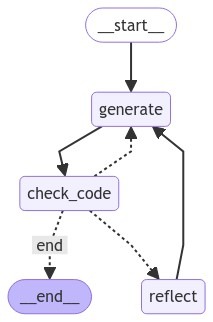

In [89]:
from langgraph.graph import END, StateGraph, START
from IPython.display import Image, display

workflow = StateGraph(GraphState)

# Define the nodes
workflow.add_node("generate", generate)  # generation solution
workflow.add_node("check_code", code_check)  # check code
workflow.add_node("reflect", reflect)  # reflect

# Build graph
workflow.add_edge(START, "generate")
workflow.add_edge("generate", "check_code")
workflow.add_conditional_edges(
    "check_code",
    decide_to_finish,
    {
        "end": END,
        "reflect": "reflect",
        "generate": "generate",
    },
)
workflow.add_edge("reflect", "generate")
app = workflow.compile()

print(app)
display(Image(app.get_graph().draw_mermaid_png()))

In [94]:
result = app.invoke({"messages": [("user", task_string)],  "iterations": 2}, debug=True)
code_gen = str(result['generation'].imports) + '\n' + str(result['generation'].code)

[0:tasks] Starting step 0 with 1 task:
- __start__ -> {'iterations': 2,
 'messages': [('user',
               'CHALLENGE\n'
               'Training Examples\n'
               'Example 1: Input\n'
               '[\n'
               '[0, 1, 0],\n'
               '[1, 1, 0],\n'
               '[0, 1, 0],\n'
               '[0, 1, 1],\n'
               '[0, 1, 0],\n'
               '[1, 1, 0],]\n'
               '\n'
               'Example 1: Output\n'
               '[\n'
               '[0, 2, 0],\n'
               '[2, 2, 0],\n'
               '[0, 2, 0],\n'
               '[0, 2, 2],\n'
               '[0, 2, 0],\n'
               '[2, 2, 0],\n'
               '[0, 2, 0],\n'
               '[0, 2, 2],\n'
               '[0, 2, 0],]\n'
               '\n'
               'Example 2: Input\n'
               '[\n'
               '[0, 1, 0],\n'
               '[1, 0, 1],\n'
               '[0, 1, 0],\n'
               '[1, 0, 1],\n'
               '[0, 1, 0],\n'
               '[1, 0, 1]

In [95]:
import numpy as np 

def test_task(gen_code, challenges, solutions, task_id):
    code_namespace = {}
    
    # Execute the code to define the function in the local namespace
    exec(gen_code, code_namespace)
    
    # Extract the function from the local namespace
    solve = code_namespace['solve']
    print(solve)
    
    
    print('TRAIN EXAMPLES:')
    for i, train_task in enumerate(challenges[task_id]['train']):
        
        # Get the input for the current train task
        input_grid = train_task['input']
        
        # Call the function with the input
        prediction = solve(input_grid)
        
        print(f"\nTrain Task {i+1}")
        print('input:', train_task['input'])
        print('output:', train_task['output'])
        print('prediction:', prediction)
        print('Score:', prediction == train_task['output'])

    print('\nTEST EXAMPLE:')
    test_task = challenges[task_id]['test'][0]
    
    # Call the function with the input for the test task
    prediction = solve(test_task['input'])
    
    print('input:', test_task['input'])
    print('output:', np.array(solutions[task_id][0]).shape)
    print(np.array(solutions[task_id][0]))
    print('prediction:', np.array(prediction).shape)
    print(np.array(prediction))
    print('Score:', prediction == solutions[task_id][0])
    
    return solve

solve_function = test_task(code_gen, challenges, solutions, task_id)

<function solve at 0x133aeca40>
TRAIN EXAMPLES:

Train Task 1
input: [[0, 1, 0], [1, 1, 0], [0, 1, 0], [0, 1, 1], [0, 1, 0], [1, 1, 0]]
output: [[0, 2, 0], [2, 2, 0], [0, 2, 0], [0, 2, 2], [0, 2, 0], [2, 2, 0], [0, 2, 0], [0, 2, 2], [0, 2, 0]]
prediction: [[0, 0, 1], [0, 1, 1], [0, 0, 1], [1, 0, 1], [0, 0, 1], [0, 1, 1]]
Score: False

Train Task 2
input: [[0, 1, 0], [1, 0, 1], [0, 1, 0], [1, 0, 1], [0, 1, 0], [1, 0, 1]]
output: [[0, 2, 0], [2, 0, 2], [0, 2, 0], [2, 0, 2], [0, 2, 0], [2, 0, 2], [0, 2, 0], [2, 0, 2], [0, 2, 0]]
prediction: [[0, 0, 1], [1, 1, 0], [0, 0, 1], [1, 1, 0], [0, 0, 1], [1, 1, 0]]
Score: False

Train Task 3
input: [[0, 1, 0], [1, 1, 0], [0, 1, 0], [0, 1, 0], [1, 1, 0], [0, 1, 0]]
output: [[0, 2, 0], [2, 2, 0], [0, 2, 0], [0, 2, 0], [2, 2, 0], [0, 2, 0], [0, 2, 0], [2, 2, 0], [0, 2, 0]]
prediction: [[0, 0, 1], [0, 1, 1], [0, 0, 1], [0, 0, 1], [0, 1, 1], [0, 0, 1]]
Score: False

TEST EXAMPLE:
input: [[1, 1, 1], [0, 1, 0], [0, 1, 0], [1, 1, 1], [0, 1, 0], [0, 1, 0]]

# Multiple lp_ai CODE


El modelo tiene que:
1. Generar un codigo para hacer los patrones
2. Ejecutarlo contra los ejemplos de train
3. Validar que funcionen los ejemplos de train
4. Si no funcionan, hacer self-correction hasta que funcionen
4. Producir el output de test


Bastante basado en https://langchain-ai.github.io/langgraph/tutorials/code_assistant/langgraph_code_assistant/ (esta tambien en el demo de llm_agents)

In [3]:
def json_task_to_string(challenge_tasks: dict, task_id: str, test_input_index: int) -> str:
    json_task = challenge_tasks[task_id]

    # final_output = "I will present a series of examples to you. Each example will have an input and an output. You need to find the logical pattern for each input and the output for all the examples and follow the same logic to produce the output for the test case, by creating a python program and using the tools for structuring in the correct way.\n\n"
    final_output = "CHALLENGE\n"

    train_tasks = json_task['train']
    test_task = json_task['test']

    final_output += "Training Examples\n"

    for i, task in enumerate(train_tasks):
        final_output += f"Example {i + 1}: Input\n["
        for row in task['input']:
            final_output += f"\n{str(row)},"

        final_output += "]\n\n"
        final_output += f"Example {i + 1}: Output\n["

        for row in task['output']:
            final_output += f"\n{str(row)},"

        final_output += "]\n\n"

    final_output += "Test\n["
    for row in test_task[test_input_index]['input']:
        final_output += f"\n{str(row)}"

    # final_output += "]\n\nYour Response:"

    return final_output


def json_task_inputs_to_string(challenge_tasks: dict, task_id: str, test_input_index: int) -> str:
    json_task = challenge_tasks[task_id]

    final_output = "I will present a series of examples to you. Each example will have an input. You will need to find the logical pattern for each input and follow the same logic to produce the output for the test case.\n\n"

    train_tasks = json_task['train']
    test_task = json_task['test']

    final_output += "Training Examples\n"

    for i, task in enumerate(train_tasks):
        final_output += f"Example {i + 1}: Input\n["
        for row in task['input']:
            final_output += f"\n{str(row)},"

        final_output += "]\n\n"

    final_output += f"Example {i + 2}: Input\n["
    for row in test_task[test_input_index]['input']:
        final_output += f"\n{str(row)}"

    final_output += ",]"
    return final_output


### Agents

In [4]:
# task_id = "017c7c7b" # SI
# task_id = "025d127b" # SI
task_id = "045e512c" # NO
task_id = "05f2a901" # NO
task_id = "0520fde7" # 

#### Utils

In [5]:
from langchain_ollama import ChatOllama
from langchain_experimental.llms.ollama_functions import OllamaFunctions
from langchain_core.prompts import ChatPromptTemplate, PromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field
from langchain_openai import ChatOpenAI
import os

# Read API key from environment variable
openai_api_key = os.getenv('OPENAI_API_KEY')
if not openai_api_key:
    raise ValueError("OpenAI API key is not defined.")


task_string = json_task_to_string(challenges, task_id, 0)


# def trace_output(result):
#     print("Structured LLM Output:")
#     print(str(result['raw'].content))
#     print(result)
#     return result

def check_output(tool_output):
    print("\n----------------------------------------------\nTool Output:\n")
    # print(str(tool_output["raw"].content))
    print(tool_output)
    if tool_output["parsing_error"]:
        print("Parsing error!")
        raw_output = str(tool_output["raw"].content)
        raw_output = tool_output
        error = tool_output["parsing_error"]
        raise ValueError(
            f"Error parsing your output! Be sure to invoke the tool. Output: {raw_output}. \n Parse error: {error}"
        )
    elif not tool_output["parsed"]:
        print("Failed to invoke tool!")
        raise ValueError(
            "You did not use the provided tool! Be sure to invoke the tool to structure the output."
        )
    return tool_output

def parse_output(solution):
    print("Final Parsed Output:", solution["parsed"])
    return solution["parsed"]

def insert_errors(inputs):
    """Insert errors for tool parsing in the messages"""
    # Get errors
    error = inputs["error"]
    messages = inputs["messages"]
    messages += [
        (
            "assistant",
            f"Retry. You are required to fix the parsing errors: {error} \n\n You must invoke the provided tool.",
        )
    ]
    return {
        "messages": messages,
        "context": inputs["context"],
    }

#### Generators llm

In [6]:
# TOOL

# Data model
# TODO: create a tool that parses each of the pattern that the models generate
class patterns(BaseModel):
    patterns = "Chain of thought process explaining step by step the reasoning of the solution."
    description = "Schema for code solutions to questions about the challenge."

# Prompt to enforce tool use
gen_prompt = ChatPromptTemplate.from_messages(
    [
        (
        "system",
    """You are a VERY SMART AI called {llm_name} who is very good at solving puzzles. Below is a list of input and output pairs with a pattern. First say your name." 
    You need to identify 5 patterns that fit the training examples and enumerate them. ONLY LIST THE PATTERNS.
    Hint: imagine the problem as a grid. Each number represents a different color. Imagine it visually and identify the pattern. Be very careful with the shape of the grids and identify the patterns for the inputs and outputs.
    """, # \n{task_string}\n
    #  Elaborate on WHY the patterns and double check if they are consistent with ALL the examples.
    #    Then create a simple python program that solves each of the example (produce the output for each example input).
    # Invoke the code tool to structure the output correctly. The code should only be the imports and a function called "solve", no examples or prints.
        ),
        ("placeholder", "{messages}"),
    ]
)

# LLM
gen_llm = ChatOllama(model="llama3.1", temperature=0, max_tokens=1000)
# gen_llm = ChatOpenAI(model='gpt-4-turbo', openai_api_key=openai_api_key, max_tokens=1000)

gen_chain = (gen_prompt | gen_llm)

# Format and print the prompt
# print(f'Prompt:\n\n{gen_prompt.format(llm_name="llama3.1", messages=[("user", task_string)])}')

In [7]:
# # Test

# solution = gen_chain.invoke(
#     {"llm_name": "llama3.1", "messages": [("user", task_string)]}
# )

# print("\n\nGenerated Solution:\n")
# print(solution.content)

#### Combinator llm

In [8]:
from langchain_experimental.llms.ollama_functions import OllamaFunctions

# TOOL
# Data model
class CombineSolutionsTool(BaseModel):
    reasoning: str = Field(description="Chain of thought process explaining step by step the reasoning of the solution.")
    patterns: str = Field(description="Enumerate the patterns used to solve the problem.")
    # imports: str = Field(description="Code block import statements")
    # code: str = Field(description="Code block not including import statements")
    description = "Schema for code solutions to questions about the challenge."
    test_output: str = Field(description="Output for the TEST case (applying the patterns).")


# Prompt to enforce tool use
combinator_prompt = ChatPromptTemplate.from_messages(
    [
        (
        "system",
    """You are a VERY SMART AI called {llm_name} who is very good at solving puzzles. Below is a list of input and output pairs with a pattern." 
    Your job is to look at the problem and compare the responses from the AIs (patterns already identified) and select the best patterns, analyze them and combine them. Also use your own knowledge about the problem.
    Hint: imagine the problem as a grid. Each number represents a different color. Imagine it visually and identify the pattern. Be very careful with the shape of the grids and identify the patterns for the inputs and outputs."
    Your GOAL is to apply the patterns and get the output for the test example.
    INVOKE THE "CombineSolutionsTool" tool to structure the output correctly based on the definitions. """ # \n{task_string}\n
        ),
        ("placeholder", "{messages}"),
    ]
)
# Create a simple python program that solves each of the example (produce the same output for each example input) using the patterns and also the test case."
# The code should only be the imports and a function called "solve", no examples or prints.

# LLM
# combinator_llm = ChatOllama(model="llama3.1", temperature=0, max_tokens=1000).with_structured_output(CombineSolutionsTool, include_raw=True)
# combinator_llm = OllamaFunctions(model="llama3", format="json", temperature=0).with_structured_output(CombineSolutionsTool, include_raw=True)
combinator_llm = ChatOpenAI(model='gpt-4o', openai_api_key=openai_api_key, max_tokens=1000).with_structured_output(CombineSolutionsTool, include_raw=True)

# chain
combinator_chain = combinator_prompt | combinator_llm | check_output

# # This will be run as a fallback chain
fallback_chain = insert_errors | combinator_chain
N = 1

combinator_chain_retry = combinator_chain.with_fallbacks(fallbacks=[fallback_chain] * N, exception_key="error")

combinator_chain = combinator_chain_retry | parse_output

In [9]:
messages_context = [('user', 'CHALLENGE\nTraining Examples\nExample 1: Input\n[\n[0, 1, 0],\n[1, 1, 0],\n[0, 1, 0],\n[0, 1, 1],\n[0, 1, 0],\n[1, 1, 0],]\n\nExample 1: Output\n[\n[0, 2, 0],\n[2, 2, 0],\n[0, 2, 0],\n[0, 2, 2],\n[0, 2, 0],\n[2, 2, 0],\n[0, 2, 0],\n[0, 2, 2],\n[0, 2, 0],]\n\nExample 2: Input\n[\n[0, 1, 0],\n[1, 0, 1],\n[0, 1, 0],\n[1, 0, 1],\n[0, 1, 0],\n[1, 0, 1],]\n\nExample 2: Output\n[\n[0, 2, 0],\n[2, 0, 2],\n[0, 2, 0],\n[2, 0, 2],\n[0, 2, 0],\n[2, 0, 2],\n[0, 2, 0],\n[2, 0, 2],\n[0, 2, 0],]\n\nExample 3: Input\n[\n[0, 1, 0],\n[1, 1, 0],\n[0, 1, 0],\n[0, 1, 0],\n[1, 1, 0],\n[0, 1, 0],]\n\nExample 3: Output\n[\n[0, 2, 0],\n[2, 2, 0],\n[0, 2, 0],\n[0, 2, 0],\n[2, 2, 0],\n[0, 2, 0],\n[0, 2, 0],\n[2, 2, 0],\n[0, 2, 0],]\n\nTest\n[\n[1, 1, 1]\n[0, 1, 0]\n[0, 1, 0]\n[1, 1, 1]\n[0, 1, 0]\n[0, 1, 0]'), ('assistant', 'I am llama3.1_0.20190692430020785.\n\nHere are the patterns I identified:\n\n1. **Alternating increment**: In each example, the output is created by alternating between incrementing and keeping the same value in a specific pattern.\n2. **Symmetry**: The outputs have symmetry around the middle row or column, depending on the input.\n3. **Grid expansion**: The grid expands by one row and one column in the output compared to the input, with the values being incremented as described above.'), ('assistant', 'I am llama3.1_0.08225603799988779.\n\nHere are the patterns I identified:\n\n1. **Pattern 1: Incrementing Color**\n\t* Input: Each row has a sequence of colors (0, 1) repeated.\n\t* Output: Each row has a sequence of colors (0, 2) repeated, with each color incremented by 1.\n2. **Pattern 2: Alternating Colors**\n\t* Input: Each row has alternating colors (0, 1).\n\t* Output: Each row has alternating colors (0, 2), but the positions of the colors are swapped.\n3. **Pattern 3: Incrementing Color with Swapped Positions**\n\t* Input: Each row has a sequence of colors (0, 1) repeated, and the positions of the colors are swapped in some rows.\n\t* Output: Each row has a sequence of colors (0, 2) repeated, with each color incremented by 1, and the positions of the colors are swapped. \n\nYour response (remember formatting the output invoking the tool):')]
print(len(messages_context))

# Format and print the prompt
# print(f'Prompt:\n\n{combinator_prompt.format(llm_name="llama3.1", messages=messages_context)}')

3


In [10]:
# # Test

# code_solution = combinator_chain.invoke({"llm_name": "COMBINATOR", "messages": messages_context})
# print("Generated Solution:\n")
# print(f"Reasoning: \n{code_solution.reasoning}\n")
# # print(f"Imports: \n```\n{code_solution.imports}\n```\n")
# # print(f"Code: \n```\n{code_solution.code}\n```\n")
# print(f"Description: \n{code_solution.description}\n")
# print(f"patterns answer: \n{code_solution.patterns}\n")
# print(f"test_output: \n{code_solution.test_output}\n")

### Code execution + retries

#### State

In [11]:
from typing import List, TypedDict
from typing import Annotated
import operator


class GraphState(TypedDict):
    
    error: str
    messages: Annotated[list, operator.add]
    # iterations: int
    generation: str


#### Graph

In [12]:
from langchain_core.pydantic_v1 import BaseModel, Field
import random

### Parameter

# Max tries
max_iterations = 3
# Reflect
# flag = 'reflect'
flag = "do not reflect"


###################################################### Nodes

def generate_patterns(state: GraphState):
    
    # State
    messages = state["messages"]
    error = state["error"]

    # We have been routed back to generation with an error
    if error == "yes":
        messages += [("user", "Now, try again. Invoke the code tool to structure the output with a reasoning, imports, and code block:",)]

    # Model setup
    temperature = random.uniform(0, 1)
    gen_llm = ChatOllama(model="llama3.1", temperature=temperature, max_tokens=1000)
    # gen_llm = ChatOpenAI(model='gpt-4o', openai_api_key=openai_api_key, max_tokens=1000)
    
    # Chain
    gen_chain = (gen_prompt | gen_llm)
    print(f"---GENERATING PATTERNS llama3.1_{temperature}---")
    patterns = gen_chain.invoke({"llm_name": f"llama3.1_{temperature}", "messages": [("user", task_string)]})
    
    return {"messages": [("assistant", patterns.content)]}


def combination(state: GraphState):
    print("---COMBINING CODE SOLUTION---")

    # State
    messages = state["messages"]
    error = state["error"]
    print(f'COMBINATOR\nMessages:')
    for message in messages[1:]:
        print('-------------------------------------------------------------')
        print(message[1])

    # We have been routed back to generation with an error
    if error == "yes": messages += [("user", "Now, try again. Invoke the code tool to structure the output with a reasoning, imports, and code block:",)]

    # Solution
    code_solution = combinator_chain.invoke({"llm_name": "COMBINATOR", "messages": messages})
    
    return {"generation": code_solution, "messages": [("assistant", code_solution)]}


def code_check(state: GraphState):
    print("---CHECKING CODE---")

    # State
    messages = state["messages"]
    code_solution = state["generation"]

    # Get solution components
    imports = code_solution.imports
    code = code_solution.code

    # Check imports
    try:
        exec(imports)
    except Exception as e:
        print("---CODE IMPORT CHECK: FAILED---")
        error_message = [("user", f"Your solution failed the import test: {e}")]
        messages += error_message
        return {
            "generation": code_solution,
            "messages": messages,
            "error": "yes",
        }

    # Check execution
    try:
        exec(imports + "\n" + code)
    except Exception as e:
        print("---CODE BLOCK CHECK: FAILED---")
        error_message = [("user", f"Your solution failed the code execution test: {e}")]
        messages += error_message
        return {
            "generation": code_solution,
            "messages": messages,
            "error": "yes",
        }

    # No errors
    print("---NO CODE TEST FAILURES---")
    return {
        "generation": code_solution,
        "messages": messages,
        "error": "no",
    }


def reflect(state: GraphState):
    print("---REFLECTING: GENERATING CODE SOLUTION---")

    # State
    messages = state["messages"]
    code_solution = state["generation"]

    # Prompt reflection

    # Add reflection
    reflections = code_gen_chain.invoke({"llm_name": "llama3.1", "messages": [("user", task_string)]})
    messages += [("assistant", f"Here are reflections on the error: {reflections}")]
    return {"generation": code_solution, "messages": messages}



###################################################### Edges

def decide_to_finish(state: GraphState):
    error = state["error"]
    
    if error == "no":
        print("---DECISION: FINISH---")
        return "end"
    else:
        print("---DECISION: RE-TRY SOLUTION---")
        if flag == "reflect":
            return "reflect"
        else:
            return "combinator"

#### Execution

nodes={'__start__': PregelNode(config={'tags': ['langsmith:hidden'], 'metadata': {}, 'configurable': {}}, channels=['__start__'], triggers=['__start__'], writers=[ChannelWrite<error,messages,generation>(recurse=True, writes=[ChannelWriteEntry(channel='error', value=<object object at 0x1317d4a80>, skip_none=False, mapper=_get_state_key(recurse=False)), ChannelWriteEntry(channel='messages', value=<object object at 0x1317d4a80>, skip_none=False, mapper=_get_state_key(recurse=False)), ChannelWriteEntry(channel='generation', value=<object object at 0x1317d4a80>, skip_none=False, mapper=_get_state_key(recurse=False))], require_at_least_one_of=['error', 'messages', 'generation']), ChannelWrite<start:generator_3>(recurse=True, writes=[ChannelWriteEntry(channel='start:generator_3', value='__start__', skip_none=False, mapper=None)], require_at_least_one_of=None), ChannelWrite<start:generator_1>(recurse=True, writes=[ChannelWriteEntry(channel='start:generator_1', value='__start__', skip_none=Fals

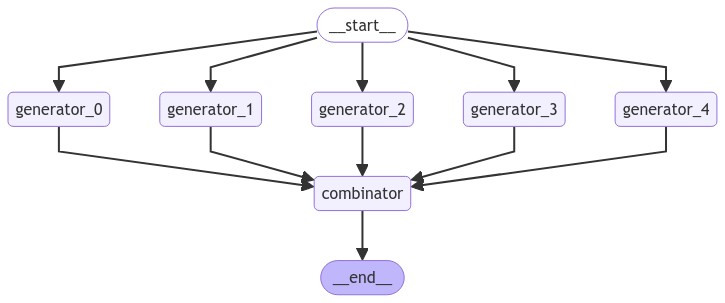

In [13]:
from langgraph.graph import END, StateGraph, START
from IPython.display import Image, display

workflow = StateGraph(GraphState)

num_generators = 5

# Define the nodes
for i in range(num_generators):
    workflow.add_node(f"generator_{i}", generate_patterns)
workflow.add_node("combinator", combination)
# workflow.add_node("check_code", code_check)
# workflow.add_node("reflect", reflect)

# Build graph
for i in range(num_generators):
    workflow.add_edge(START, f"generator_{i}")
    workflow.add_edge(f"generator_{i}", "combinator")
# workflow.add_edge("combinator", "check_code")
# workflow.add_conditional_edges(
#     "check_code",
#     decide_to_finish,
#     {
#         "end": END,
#         "reflect": "reflect",
#         "combinator": "combinator",
#     },
# )
# workflow.add_edge("reflect", "combinator")
workflow.add_edge("combinator", END)
app = workflow.compile()

print(app)
display(Image(app.get_graph().draw_mermaid_png()))

In [14]:
result = app.invoke({"messages": [("user", task_string)]}, debug=False)

print("\n\nGenerated Solution:\n")
print(f"Reasoning: \n{result['generation'].reasoning}\n")
print(f"Patterns used: \n{result['generation'].patterns}\n")
print(f"Description: \n{result['generation'].description}\n")
test_output = result['generation'].test_output
print(f"Final answer:")
print(test_output)

# code_gen = str(result['generation'].imports) + '\n' + str(result['generation'].code)
# print(f"Code: \n{code_gen}")

---GENERATING PATTERNS llama3.1_0.7302774309720959------GENERATING PATTERNS llama3.1_0.28284293337794786---
---GENERATING PATTERNS llama3.1_0.8413819069289196---

---GENERATING PATTERNS llama3.1_0.7553221072064763---
---GENERATING PATTERNS llama3.1_0.4026273976929764---
---COMBINING CODE SOLUTION---
COMBINATOR
Messages:
-------------------------------------------------------------
I am llama3.1_0.7553221072064763.

After analyzing the training examples, I have identified five patterns that fit the input and output pairs:

1. **Symmetrical Pattern**: The pattern in which the shape of the grid is symmetrical about a vertical line or axis.
2. **Alternating Pattern**: The pattern in which each row (or column) alternates between two different values.
3. **Convex Polygon Pattern**: The pattern in which the shape of the grid forms a convex polygon, where all angles are less than 180 degrees.
4. **Box Pattern**: The pattern in which the shape of the grid is a box or rectangle with equal dimens

In [15]:
print(f"Task ID: {task_id}")
print('\nTEST EXAMPLE:')
test_task = challenges[task_id]['test'][0]

prediction = ast.literal_eval(test_output)

print('input:', test_task['input'])
print('output:', np.array(solutions[task_id][0]).shape)
print(np.array(solutions[task_id][0]))
print('prediction:', np.array(prediction).shape)
print(np.array(prediction))
print('Score:', prediction == solutions[task_id][0])

Task ID: 0520fde7

TEST EXAMPLE:
input: [[1, 0, 1, 5, 1, 0, 1], [0, 1, 0, 5, 1, 0, 1], [1, 0, 1, 5, 0, 1, 0]]
output: (3, 3)
[[2 0 2]
 [0 0 0]
 [0 0 0]]
prediction: (3, 3)
[[2 0 2]
 [0 2 0]
 [2 0 0]]
Score: False


In [49]:
import numpy as np 

def test_task(gen_code, challenges, solutions, task_id):
    code_namespace = {}
    
    # Execute the code to define the function in the local namespace
    exec(gen_code, code_namespace)
    
    # Extract the function from the local namespace
    solve = code_namespace['solve']
    print(solve)
    
    
    print('TRAIN EXAMPLES:')
    for i, train_task in enumerate(challenges[task_id]['train']):
        
        # Get the input for the current train task
        input_grid = train_task['input']
        
        # Call the function with the input
        prediction = solve(input_grid)
        
        print(f"\nTrain Task {i+1}")
        print('input:', train_task['input'])
        print('output:', train_task['output'])
        print('prediction:', prediction)
        print('Score:', prediction == train_task['output'])

    print('\nTEST EXAMPLE:')
    test_task = challenges[task_id]['test'][0]
    
    # Call the function with the input for the test task
    prediction = solve(test_task['input'])
    
    print('input:', test_task['input'])
    print('output:', np.array(solutions[task_id][0]).shape)
    print(np.array(solutions[task_id][0]))
    print('prediction:', np.array(prediction).shape)
    print(np.array(prediction))
    print('Score:', prediction == solutions[task_id][0])
    
    return solve

solve_function = test_task(code_gen, challenges, solutions, task_id)

#### Iterations

In [16]:
final_answers = []
for i in range(10):
    print(f"\n\nGENERATOR {i}\n\n")
    result = app.invoke({"messages": [("user", task_string)]}, debug=False)
    test_output = result['generation'].test_output
    print(test_output)
    final_answers.append(test_output)



GENERATOR 0


---GENERATING PATTERNS llama3.1_0.9269025547500309---
---GENERATING PATTERNS llama3.1_0.015735448735360147---
---GENERATING PATTERNS llama3.1_0.9568059588389018---
---GENERATING PATTERNS llama3.1_0.4700259979429606---
---GENERATING PATTERNS llama3.1_0.677276789173415---
---COMBINING CODE SOLUTION---
COMBINATOR
Messages:
-------------------------------------------------------------
I'm llama3.1_0.9269025547500309.

Here are the 5 patterns that fit the training examples:

**Pattern 1:** 
For each row of input grid:
- If a cell contains value 5, it becomes the center of an L-shape in the output grid.
- Otherwise, cells with non-zero values on both sides of cell (i, j) in the input grid are assigned a value of 2 to form an inverted T-shape in the output grid.

**Pattern 2:** 
For each row of input grid:
- If a cell contains value 5 and there is at least one cell with non-zero value on either side of it (i.e., i > 0 or j < length(row)), then the corresponding cells in the ou

In [17]:
from collections import Counter

answers_count = Counter(final_answers)
answers_count

Counter({'[\n[0, 2, 0],\n[0, 2, 0],\n[0, 2, 0]\n]': 1,
         '[\n[0, 0, 0],\n[0, 2, 0],\n[0, 0, 0]]': 1,
         '[\n [0, 0, 0],\n [0, 2, 0],\n [0, 0, 2]\n]': 1,
         '[\n[0, 0, 0],\n[0, 0, 2],\n[0, 0, 0]\n]': 1,
         '[\n[0, 2, 0],\n[2, 0, 2],\n[0, 2, 0]\n]': 1,
         '[[0, 2, 0], [2, 0, 2], [0, 2, 0]]': 1,
         '[\n[0, 2, 0],\n[0, 0, 2],\n[0, 2, 0],]': 1,
         '[\n[0, 0, 0],\n[0, 2, 0],\n[0, 0, 2],\n]': 1,
         '[\n[0, 0, 0],\n[0, 2, 0],\n[0, 0, 0]\n]': 1,
         '[\n[0, 2, 0],\n[0, 0, 0],\n[0, 0, 0],\n]': 1})

In [20]:
print(f"Task ID: {task_id}")
print('\nTEST EXAMPLE:')
test_task = challenges[task_id]['test'][0]

prediction = ast.literal_eval(answers_count.most_common(1)[0][0])

print('input:', test_task['input'])
print('output:', np.array(solutions[task_id][0]).shape)
print(np.array(solutions[task_id][0]))
print('prediction:', np.array(prediction).shape)
print(np.array(prediction))
print('Score:', prediction == solutions[task_id][0])

Task ID: 0520fde7

TEST EXAMPLE:
input: [[1, 0, 1, 5, 1, 0, 1], [0, 1, 0, 5, 1, 0, 1], [1, 0, 1, 5, 0, 1, 0]]
output: (3, 3)
[[2 0 2]
 [0 0 0]
 [0 0 0]]
prediction: (3, 3)
[[0 2 0]
 [0 2 0]
 [0 2 0]]
Score: False


In [24]:
print('input:', test_task['input'])
print('output:', np.array(solutions[task_id][0]).shape)
print(np.array(solutions[task_id][0]))

for answer in final_answers:
    try:
        prediction = ast.literal_eval(answer)
        print('Score:', prediction == solutions[task_id][0])
        if prediction == solutions[task_id][0]:
            print('prediction:', np.array(prediction).shape)
            print(np.array(prediction))
    except:
        print("Bad format")
        print(answer)

input: [[1, 0, 1, 5, 1, 0, 1], [0, 1, 0, 5, 1, 0, 1], [1, 0, 1, 5, 0, 1, 0]]
output: (3, 3)
[[2 0 2]
 [0 0 0]
 [0 0 0]]
Score: False
Score: False
Score: False
Score: False
Score: False
Score: False
Score: False
Score: False
Score: False
Score: False


# lp_ai structured patterns